# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
from collections import Counter
import numpy as np

# setup chart layout
bins = 43 # 43 different types of signs
idx = np.arange(bins)
barWidth = 0.6

# plot histogram of all data sets
allLabels = [y_train,y_valid,y_test]

plt.hist(allLabels,bins=43,label=['Train','Validate','Test'], \
         histtype='barstacked',stacked=True, width=barWidth)
plt.xlabel('Sign Number')
plt.ylabel('Count')
plt.legend()

# get counts of each sign type per data set
trainCnt = Counter(y_train)
validCnt = Counter(y_valid)
testCnt = Counter(y_test)

# initialize the plot
figure, axes = plt.subplots(nrows=2,ncols=3,figsize=(20,10))



# get bars per data set
trainBars = axes[0][0].bar(idx, trainCnt.values(), width=barWidth, color='b', label='Train')
validBars = axes[0][1].bar(idx+barWidth, validCnt.values(), width=barWidth, color='r', label='Validate')
testBars = axes[0][2].bar(idx+barWidth*2, testCnt.values(), width=barWidth, color='g', label='Test')

# get pie charts per data set
trainPie = axes[1][0].pie(list(trainCnt.values()), labels=idx, autopct='%1.1f%%')
validPie = axes[1][1].pie(list(validCnt.values()), labels=idx, autopct='%1.1f%%')
testPie = axes[1][2].pie(list(testCnt.values()), labels=idx, autopct='%1.1f%%')


for ax in axes[0]:
    ax.set_xlabel('Sign Number')
    ax.set_ylabel('Count')
    ax.legend()
    
figure.show()

NameError: name 'plt' is not defined

In [1]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def rgb2Grey(rgbImage,weights=[1.0,1.0,1.0]):
    """simple multi-channel to 1 channel conversion"""
    grey = np.zeros((img.shape[0],img.shape[1]))
    for i in range(len(img)):
        for j in range(len(img[i])):
            grey[i][j] = np.average(img[i][j])
    return grey

def applyRGBThresholds(img,rgbThreshold=[0,0,0]):
    colorSelect = np.copy(img)
    imgThresholds = (img[:,:,0] < rgbThreshold[0]) \
                | (img[:,:,1] < rgbThreshold[1]) \
                | (img[:,:,2] < rgbThreshold[2])
    colorSelect[imgThresholds] = [0,0,0]
    
    return colorSelect

def applyGreyThresholds(img,thresholds=[0,255]):
    greySelect = np.copy(img)
    
    # lower bounds
    lowThresholds = (img[:,:] < thresholds[0])
    greySelect[lowThresholds] = 0
    
    # upper bounds
    highThresholds = (img[:,:] > thresholds[1])
    greySelect[highThresholds] = 255
    
    return greySelect

def imageViz(img,label=""):
    figure, axes = plt.subplots(nrows=3,ncols=4,figsize=(8,8))
    
    #show raw image
    figure.text(0,1,label)
    axes[0][0].imshow(img)

    # check image against each of the color channels
    #for i in range(1,4):
    #    axes[1][i].imshow(img[:,:,i-1],cmap=plt.cm.Greys_r)

    # rgb thresholding
    axes[0][1].imshow(applyRGBThresholds(img,rgbThreshold=[100,0,0]))
    axes[0][2].imshow(applyRGBThresholds(img,rgbThreshold=[0,100,0]))
    axes[0][3].imshow(applyRGBThresholds(img,rgbThreshold=[0,0,100]))

    # greyscale
    gImg = rgb2Grey(img)
    axes[1][0].imshow(gImg,cmap=plt.cm.Greys_r)

    # greyscale thresholding
    axes[1][1].imshow(applyGreyThresholds(gImg,thresholds=[10,80]),cmap=plt.cm.Greys_r)
    axes[1][2].imshow(applyGreyThresholds(gImg,thresholds=[20,100]),cmap=plt.cm.Greys_r)
    axes[1][3].imshow(applyGreyThresholds(gImg,thresholds=[30,200]),cmap=plt.cm.Greys_r)

    # greyscaled with ratio 
    # (https://samarthbhargav.wordpress.com/2014/05/05/image-processing-with-python-rgb-to-grayscale-conversion/)
    # Green is the most prominent color (nearly 60%), followed by red(30%) and finally blue(11%). 
    gImg = rgb2Grey(img, weights=[.299,.587,.114])
    axes[2][0].imshow(gImg,cmap=plt.cm.Greys_r)

    # greyscale thresholding
    axes[2][1].imshow(applyGreyThresholds(gImg,thresholds=[10,80]),cmap=plt.cm.Greys_r)
    axes[2][2].imshow(applyGreyThresholds(gImg,thresholds=[20,100]),cmap=plt.cm.Greys_r)
    axes[2][3].imshow(applyGreyThresholds(gImg,thresholds=[30,200]),cmap=plt.cm.Greys_r)

    figure.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


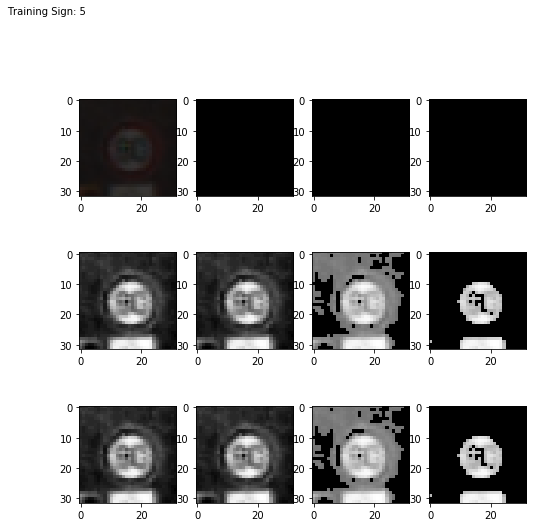

In [7]:
import random

idx = random.randint(0,len(X_train))
img = X_train[idx].squeeze()
lbl = "Training Sign: {}".format(y_train[idx])

imageViz(img,lbl)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


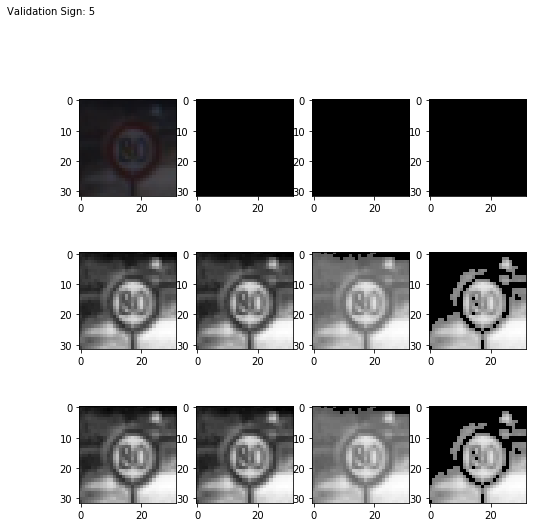

In [8]:
import random

idx = random.randint(0,len(X_valid))
img = X_valid[idx].squeeze()
lbl = "Validation Sign: {}".format(y_valid[idx])

imageViz(img,lbl)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


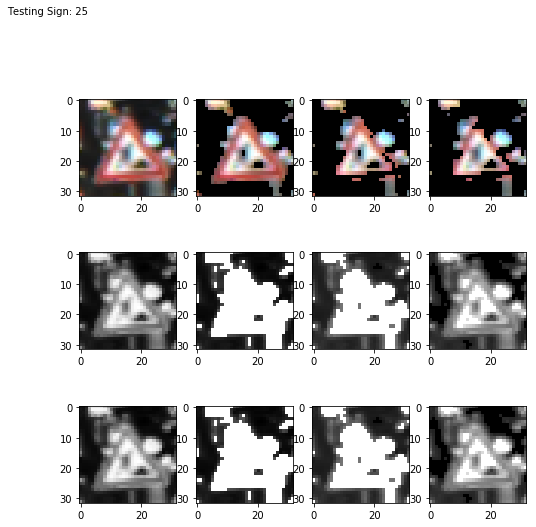

In [9]:
import random

idx = random.randint(0,len(X_test))
img = X_test[idx].squeeze()
lbl = "Testing Sign: {}".format(y_test[idx])

imageViz(img,lbl)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [2]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def rgb2Grey(rgbImage,weights=[1.0,1.0,1.0]):
    """simple multi-channel to 1 channel conversion"""
    
    return np.dot(rgbImage[...,:3], weights)

def applyRGBThresholds(img,rgbThreshold=[0,0,0]):
    colorSelect = np.copy(img)
    imgThresholds = (img[:,:,0] < rgbThreshold[0]) \
                | (img[:,:,1] < rgbThreshold[1]) \
                | (img[:,:,2] < rgbThreshold[2])
    colorSelect[imgThresholds] = [0,0,0]
    
    return colorSelect

def applyGreyThresholds(img,thresholds=[0,255]):
    greySelect = np.copy(img)
    
    # lower bounds
    lowThresholds = (img[:,:] < thresholds[0])
    greySelect[lowThresholds] = 0
    
    # upper bounds
    highThresholds = (img[:,:] > thresholds[1])
    greySelect[highThresholds] = 255
    
    return greySelect

def imageViz(img,label=""):
    figure, axes = plt.subplots(nrows=3,ncols=4,figsize=(8,8))
    
    #show raw image
    figure.text(0,1,label)
    axes[0][0].imshow(img)

    # check image against each of the color channels
    #for i in range(1,4):
    #    axes[1][i].imshow(img[:,:,i-1],cmap=plt.cm.Greys_r)

    # rgb thresholding
    axes[0][1].imshow(applyRGBThresholds(img,rgbThreshold=[100,0,0]))
    axes[0][2].imshow(applyRGBThresholds(img,rgbThreshold=[0,100,0]))
    axes[0][3].imshow(applyRGBThresholds(img,rgbThreshold=[0,0,100]))

    # greyscale
    gImg = rgb2Grey(img)
    axes[1][0].imshow(gImg,cmap=plt.cm.Greys_r)

    # greyscale thresholding
    axes[1][1].imshow(applyGreyThresholds(gImg,thresholds=[10,80]),cmap=plt.cm.Greys_r)
    axes[1][2].imshow(applyGreyThresholds(gImg,thresholds=[20,100]),cmap=plt.cm.Greys_r)
    axes[1][3].imshow(applyGreyThresholds(gImg,thresholds=[30,200]),cmap=plt.cm.Greys_r)

    # greyscaled with ratio 
    # (https://samarthbhargav.wordpress.com/2014/05/05/image-processing-with-python-rgb-to-grayscale-conversion/)
    # Green is the most prominent color (nearly 60%), followed by red(30%) and finally blue(11%). 
    gImg = rgb2Grey(img, weights=[.299,.587,.114])
    axes[2][0].imshow(gImg,cmap=plt.cm.Greys_r)

    # greyscale thresholding
    axes[2][1].imshow(applyGreyThresholds(gImg,thresholds=[10,80]),cmap=plt.cm.Greys_r)
    axes[2][2].imshow(applyGreyThresholds(gImg,thresholds=[20,100]),cmap=plt.cm.Greys_r)
    axes[2][3].imshow(applyGreyThresholds(gImg,thresholds=[30,200]),cmap=plt.cm.Greys_r)

    figure.show()
    
def normalizeRGB(image):      
    return (image[::] - 128.0) / 128.0

def normalizeGrey(image):      
    return (image[::] - 128.0) / 128.0

def normalizeRGBGrey(image):      
    return (image[::] - 128.0) / 128.0

def vizAccuracies(accuracies, title='', graphDim=(10,5)):

    figure, axes = plt.subplots(nrows=1,ncols=1,figsize=graphDim)
    axes.plot(accuracies)
    axes.set_xlabel('Epoch')
    axes.set_ylabel('Accuracy')
    axes.set_title(title)
   
    figure.show()


### Model Architecture

In [2]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [3]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import numpy as np

def convLayer(inputValue, layerWeights, layerBiases, layerName, convStrides=[1,1,1,1], layerPadding="VALID"):
    '''
    Creates a convolutional layer with:
        (i) Convolution with stride
        (ii) Activation function (ReLU)
    '''
    
    c = tf.nn.conv2d(input=inputValue, filter=layerWeights, strides=convStrides, padding=layerPadding)
    c = tf.nn.bias_add(value=c, bias=layerBiases)
    c = tf.nn.relu(c)
    
    return tf.nn.relu(c,name=layerName)

def convLayerWithMaxPool(inputValue, layerWeights, layerBiases, layerName, convStrides=[1,1,1,1], layerPadding="VALID",\
              poolingSize=[1,2,2,1], poolingStride=[1,2,2,1]):
    '''
    Creates a convolutional layer with:
        (i) Convolution with stride
        (ii) Activation function (ReLU)
        (iii) Pooling
    '''
    
    c = convLayer(inputValue, layerWeights, layerBiases, layerName+'_0', convStrides, layerPadding)
    
    return tf.nn.max_pool(value=c, ksize=poolingSize, strides=poolingStride, padding=layerPadding, name=layerName)

def fullLayer(inputValue, layerWeights, layerBiases, layerName):
    '''
    Creates a fully connected layer with:
    (i) (W*x)+b
    (ii) Activation function (ReLU)
    '''
    f = tf.add(tf.matmul(inputValue,layerWeights), layerBiases)
    
    return tf.nn.relu(f, name=layerName)

def leNet(image):
    mu = 0
    sigma = 0.1
    
    weights = {"c1":tf.Variable(tf.truncated_normal(shape=[5,5,3,6], mean=mu, stddev=sigma)),
               "c2":tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean=mu, stddev=sigma)),
               "fc1":tf.Variable(tf.truncated_normal(shape=[5*5*16,120], mean=mu, stddev=sigma)),
               "fc2":tf.Variable(tf.truncated_normal(shape=[120,84], mean=mu, stddev=sigma)),
               "logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
              }
    biases = {"c1":tf.Variable(tf.zeros(6)),
              "c2":tf.Variable(tf.zeros(16)),
              "fc1":tf.Variable(tf.zeros(120)),
              "fc2":tf.Variable(tf.zeros(84)),
              "logits":tf.Variable(tf.zeros(43))
             }
    
    # layer 1: Convolutional with output shape 28x28x6
    c1 = convLayerWithMaxPool(inputValue=image, layerWeights=weights["c1"], layerBiases=biases["c1"], layerName="c1")
    
    # layer 2: Convolutional with output shape 14x14x16
    c2 = convLayerWithMaxPool(inputValue=c1, layerWeights=weights["c2"], layerBiases=biases["c2"], layerName="c2")
    
    # flatten layer for fully connected layer
    f = flatten(c2)
    #print(f)#.shape)
    
    # layer 3: Fully Connected
    fc1 = fullLayer(inputValue=f, layerWeights=weights["fc1"], layerBiases=biases["fc1"], layerName="fc1")
    
    # layer 4: Fully Connected
    fc2 = fullLayer(inputValue=fc1, layerWeights=weights["fc2"], layerBiases=biases["fc2"], layerName="fc2")
    
    # layer 5
    return tf.add(tf.matmul(fc2,weights["logits"]),biases["logits"])

    
def myNet(image, weights, biases, dropProb): 
    
    ### GROUP 1
    # layer 1: Convolutional with output shape 32x32x8
    c1 = convLayer(inputValue=image, layerWeights=weights["c1"], layerBiases=biases["c1"],
                              layerPadding="SAME", layerName="c1")   
    c1 = tf.nn.dropout(c1, dropProb)
    
    # layer 2: Convolutional with output shape 32x32x16
    c2 = convLayer(inputValue=c1, layerWeights=weights["c2"], layerBiases=biases["c2"], 
                              layerPadding="SAME", layerName="c2")    
    c2 = tf.nn.dropout(c2, dropProb) 
    
    
    
    ### GROUP 2
    # layer 3: Convolutional (max pooling) with output shape 16x16x16
    c3 = convLayerWithMaxPool(inputValue=c2, layerWeights=weights["c3"], layerBiases=biases["c3"], 
                              layerPadding="SAME", layerName="c3")  
    c3 = tf.nn.dropout(c3, dropProb) 
    
    # layer 4: Convolutional with output shape 16x16x16
    #c4 = convLayer(inputValue=c3, layerWeights=weights["c4"], layerBiases=biases["c4"],
    #                        layerPadding="SAME", layerName="c4")    
    #c4 = tf.nn.dropout(c4, dropProb) 
    
    # layer 5: Convolutional with output shape 32x32x16
    #c5 = convLayer(inputValue=c4, layerWeights=weights["c5"], layerBiases=biases["c5"], 
    #                          layerPadding="SAME", layerName="c5")  
    #c5 = tf.nn.dropout(c5, dropProb) 
    
    
    
    ### GROUP 3
    # layer 6: Convolutional (max pooling) with output shape 8x8x32
    #c6 = convLayerWithMaxPool(inputValue=c5, layerWeights=weights["c6"], layerBiases=biases["c6"], 
    #                          layerPadding="SAME", layerName="c6")  
    #c6 = tf.nn.dropout(c6, dropProb) 
    
    # layer 7: Convolutional with output shape 8x8x32
    #c7 = convLayer(inputValue=c6, layerWeights=weights["c7"], layerBiases=biases["c7"], 
    #                          layerPadding="SAME", layerName="c7")  
    #c7 = tf.nn.dropout(c7, dropProb) 
    
    # layer 8: Convolutional with output shape 8x8x32
    #c8 = convLayerWithMaxPool(inputValue=c7, layerWeights=weights["c8"], layerBiases=biases["c8"], 
    #                          layerPadding="SAME", layerName="c8")  
    #c8 = tf.nn.dropout(c8, dropProb) 
    
    
    
    # flatten layer for fully connected layer
    f = flatten(c3)
    #print(f)#.shape)
    
    
    
    ### GROUP 4
    # layer 9: Fully Connected
    fc1 = fullLayer(inputValue=f, layerWeights=weights["fc1"], layerBiases=biases["fc1"], layerName="fc1")  
    fc1 = tf.nn.dropout(fc1, dropProb) 
    
    # layer 10: Fully Connected
    fc2 = fullLayer(inputValue=fc1, layerWeights=weights["fc2"], layerBiases=biases["fc2"], layerName="fc2")  
    fc2 = tf.nn.dropout(fc2, dropProb) 
    
    # layer 11: Fully Connected
    #fc3 = fullLayer(inputValue=fc2, layerWeights=weights["fc3"], layerBiases=biases["fc3"], layerName="fc3")  
    #fc3 = tf.nn.dropout(fc3, dropProb) 
    
    
    
    ### OUTPUT
    # layer 12
    return tf.add(tf.matmul(fc2,weights["logits"]),biases["logits"], name="output")



def myRGBNet(image, dropProb):
    mu = 0
    sigma = 0.1
    
    weights = {"c1":tf.Variable(tf.truncated_normal(shape=[5,5,3,8], mean=mu, stddev=sigma)),
               "c2":tf.Variable(tf.truncated_normal(shape=[5,5,8,8], mean=mu, stddev=sigma)),
               
               "c3":tf.Variable(tf.truncated_normal(shape=[5,5,8,16], mean=mu, stddev=sigma)),
               #"c4":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               #"c5":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               
               #"c6":tf.Variable(tf.truncated_normal(shape=[5,5,16,32], mean=mu, stddev=sigma)),
               #"c7":tf.Variable(tf.truncated_normal(shape=[5,5,32,32], mean=mu, stddev=sigma)),
               
               #"c8":tf.Variable(tf.truncated_normal(shape=[5,5,32,64], mean=mu, stddev=sigma)),
               
               #"fc1":tf.Variable(tf.truncated_normal(shape=[4*4*64,120], mean=mu, stddev=sigma)),
               "fc1":tf.Variable(tf.truncated_normal(shape=[16*16*16,120], mean=mu, stddev=sigma)),
               "fc2":tf.Variable(tf.truncated_normal(shape=[120,84], mean=mu, stddev=sigma)),
               #"fc3":tf.Variable(tf.truncated_normal(shape=[84,84], mean=mu, stddev=sigma)),
               #"logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
               "logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
              }
    biases = {"c1":tf.Variable(tf.zeros(8)),
              "c2":tf.Variable(tf.zeros(8)),
              
              "c3":tf.Variable(tf.zeros(16)),
              #"c4":tf.Variable(tf.zeros(16)),
              #"c5":tf.Variable(tf.zeros(16)),

              #"c6":tf.Variable(tf.zeros(32)),
              #"c7":tf.Variable(tf.zeros(32)),           
              
              #"c8":tf.Variable(tf.zeros(64)),
              
              "fc1":tf.Variable(tf.zeros(120)),
              "fc2":tf.Variable(tf.zeros(84)),
              #"fc3":tf.Variable(tf.zeros(84)),
              "logits":tf.Variable(tf.zeros(43))
             }
    
    return myNet(image, weights, biases, dropProb)

def myGreyNet(image, dropProb):
    mu = 0
    sigma = 0.1
    
    weights = {"c1":tf.Variable(tf.truncated_normal(shape=[5,5,1,8], mean=mu, stddev=sigma)),
               "c2":tf.Variable(tf.truncated_normal(shape=[5,5,8,8], mean=mu, stddev=sigma)),
               
               "c3":tf.Variable(tf.truncated_normal(shape=[5,5,8,16], mean=mu, stddev=sigma)),
               #"c4":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               #"c5":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               
               #"c6":tf.Variable(tf.truncated_normal(shape=[5,5,16,32], mean=mu, stddev=sigma)),
               #"c7":tf.Variable(tf.truncated_normal(shape=[5,5,32,32], mean=mu, stddev=sigma)),
               
               #"c8":tf.Variable(tf.truncated_normal(shape=[5,5,32,64], mean=mu, stddev=sigma)),
               
               #"fc1":tf.Variable(tf.truncated_normal(shape=[4*4*64,120], mean=mu, stddev=sigma)),
               "fc1":tf.Variable(tf.truncated_normal(shape=[16*16*16,120], mean=mu, stddev=sigma)),
               "fc2":tf.Variable(tf.truncated_normal(shape=[120,84], mean=mu, stddev=sigma)),
               #"fc3":tf.Variable(tf.truncated_normal(shape=[84,84], mean=mu, stddev=sigma)),
               #"logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
               "logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
              }
    biases = {"c1":tf.Variable(tf.zeros(8)),
              "c2":tf.Variable(tf.zeros(8)),
              
              "c3":tf.Variable(tf.zeros(16)),
              #"c4":tf.Variable(tf.zeros(16)),
              #"c5":tf.Variable(tf.zeros(16)),

              #"c6":tf.Variable(tf.zeros(32)),
              #"c7":tf.Variable(tf.zeros(32)),           
              
              #"c8":tf.Variable(tf.zeros(64)),
              
              "fc1":tf.Variable(tf.zeros(120)),
              "fc2":tf.Variable(tf.zeros(84)),
              #"fc3":tf.Variable(tf.zeros(84)),
              "logits":tf.Variable(tf.zeros(43))
             }
    
    return myNet(image, weights, biases, dropProb)


def myRGBGreyNet(image, dropProb):
    mu = 0
    sigma = 0.1
    
    weights = {"c1":tf.Variable(tf.truncated_normal(shape=[5,5,4,8], mean=mu, stddev=sigma)),
               "c2":tf.Variable(tf.truncated_normal(shape=[5,5,8,8], mean=mu, stddev=sigma)),
               
               "c3":tf.Variable(tf.truncated_normal(shape=[5,5,8,16], mean=mu, stddev=sigma)),
               "c4":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               "c5":tf.Variable(tf.truncated_normal(shape=[5,5,16,16], mean=mu, stddev=sigma)),
               
               "c6":tf.Variable(tf.truncated_normal(shape=[5,5,16,32], mean=mu, stddev=sigma)),
               "c7":tf.Variable(tf.truncated_normal(shape=[5,5,32,32], mean=mu, stddev=sigma)),
               
               "c8":tf.Variable(tf.truncated_normal(shape=[5,5,32,64], mean=mu, stddev=sigma)),
               
               "fc1":tf.Variable(tf.truncated_normal(shape=[4*4*64,120], mean=mu, stddev=sigma)),
               "fc2":tf.Variable(tf.truncated_normal(shape=[120,84], mean=mu, stddev=sigma)),
               "fc3":tf.Variable(tf.truncated_normal(shape=[84,84], mean=mu, stddev=sigma)),
               "logits":tf.Variable(tf.truncated_normal(shape=[84,43], mean=mu, stddev=sigma))
              }
    biases = {"c1":tf.Variable(tf.zeros(8)),
              "c2":tf.Variable(tf.zeros(8)),
              
              "c3":tf.Variable(tf.zeros(16)),
              "c4":tf.Variable(tf.zeros(16)),
              "c5":tf.Variable(tf.zeros(16)),

              "c6":tf.Variable(tf.zeros(32)),
              "c7":tf.Variable(tf.zeros(32)),            
              
              "c8":tf.Variable(tf.zeros(64)),
              
              "fc1":tf.Variable(tf.zeros(120)),
              "fc2":tf.Variable(tf.zeros(84)),
              "fc3":tf.Variable(tf.zeros(84)),
              "logits":tf.Variable(tf.zeros(43))
             }
    
    return myNet(image, weights, biases, dropProb)

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [4]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [4]:
## evaluate the accuracy of the network
def evaluate(X_data, y_data, batchSize, channelCnt=3, drop_prob=1.0):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batchSize):
        batch_x, batch_y = X_data[offset:offset+batchSize], y_data[offset:offset+batchSize]
        dimensions = batch_x.shape
        batch_x = batch_x.reshape((dimensions[0],dimensions[1],dimensions[2],channelCnt))
        
        accuracy = sess.run(accuracyOperation, feed_dict={images: batch_x, labels: batch_y, dropProb: drop_prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Try RGB

#### 10 Epochs & 0.001 Learn Rate & 100% [not]Drop Probability (likely to be in the network)

Training...

EPOCH 0 ... Validation Accuracy: 0.828
EPOCH 1 ... Validation Accuracy: 0.876
EPOCH 2 ... Validation Accuracy: 0.890
EPOCH 3 ... Validation Accuracy: 0.899
EPOCH 4 ... Validation Accuracy: 0.911
EPOCH 5 ... Validation Accuracy: 0.897
EPOCH 6 ... Validation Accuracy: 0.899
EPOCH 7 ... Validation Accuracy: 0.917
EPOCH 8 ... Validation Accuracy: 0.924
EPOCH 9 ... Validation Accuracy: 0.917

FINAL EPOCH 9 ... Validation Accuracy: 0.917
Model saved


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


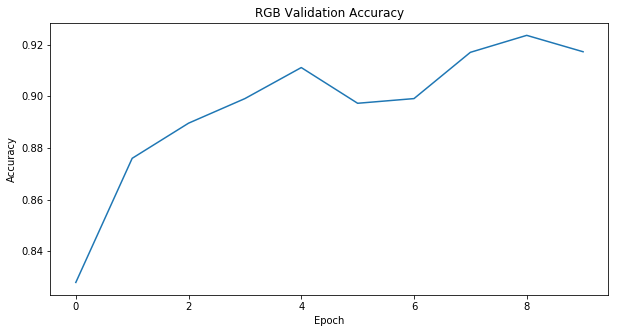

In [8]:
from sklearn.utils import shuffle
import pickle


# Global settings to be used across each implementation
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
DROP_PROB = 1.0

outputFrequency = 1



# Get the training data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
#testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
#with open(testing_file, mode='rb') as f:
#    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
#X_test, y_test = test['features'], test['labels']



# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,3))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)
dropProb = tf.placeholder(tf.float32) # probability of keeping a node in

# Normalize the images - zero mean
X_train = np.array([np.array(normalizeRGB(img)) for img in X_train])
X_valid = np.array([np.array(normalizeRGB(img)) for img in X_valid])
#_X_test = np.array([np.array(normalizeRGB(img)) for img in X_test])



accuracies = list()

logits = myRGBNet(images,DROP_PROB)#vgg16(images)#leNet(images)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=logits)
lossOperation = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
trainingOperation = optimizer.minimize(lossOperation)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
saver = tf.train.Saver()

# Run the network
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to get a random selection per batch
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] # get BATCH_SIZE (i.e. 128) records to processes
            
            
            # Run the training on the batch
            sess.run(trainingOperation, feed_dict={images: batch_x, labels: batch_y, dropProb: DROP_PROB})
        
        # Validate the model
        validation_accuracy = evaluate(X_valid, y_valid, batchSize=BATCH_SIZE, channelCnt=3)
        accuracies.append(validation_accuracy)
        
        if (i)%outputFrequency == 0:
            print("EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    print("\nFINAL EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    saver.save(sess, './rgbNet_10_001_100.ckpt')
    print("Model saved")

# Display chart of accuracy per epoch
vizAccuracies(accuracies,title='RGB Validation Accuracy')



### Try Greyscale

#### 10 Epochs & 0.001 Learn Rate & 100% [not]Drop Probability (likely to be in the network)

Training...

EPOCH 0 ... Validation Accuracy: 0.858
EPOCH 1 ... Validation Accuracy: 0.897
EPOCH 2 ... Validation Accuracy: 0.915
EPOCH 3 ... Validation Accuracy: 0.911
EPOCH 4 ... Validation Accuracy: 0.916
EPOCH 5 ... Validation Accuracy: 0.912
EPOCH 6 ... Validation Accuracy: 0.926
EPOCH 7 ... Validation Accuracy: 0.920
EPOCH 8 ... Validation Accuracy: 0.915
EPOCH 9 ... Validation Accuracy: 0.922

FINAL EPOCH 9 ... Validation Accuracy: 0.922
Model saved
Testing Model
TEST ACCURACY: 0.907


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


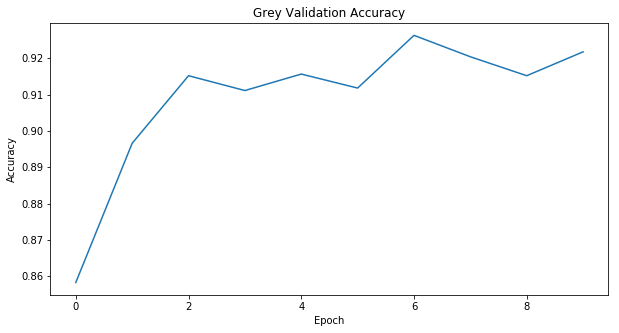

In [7]:
from sklearn.utils import shuffle
import pickle


# Global settings to be used across each implementation
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
DROP_PROB = 1.0

outputFrequency = 1



# Get the training data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,1))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)
dropProb = tf.placeholder(tf.float32) # probability of keeping a node in

# convert to greyscale
X_train = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_train])
X_valid = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_valid])
X_test = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_test])

# Normalize the images - zero mean
X_train = np.array([np.array(normalizeGrey(img)) for img in X_train])
X_valid = np.array([np.array(normalizeGrey(img)) for img in X_valid])
X_test = np.array([np.array(normalizeGrey(img)) for img in X_test])




accuracies = list()

logits = myGreyNet(images,DROP_PROB)#vgg16(images)#leNet(images)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=logits)
lossOperation = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
trainingOperation = optimizer.minimize(lossOperation)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
saver = tf.train.Saver()

# Run the network
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to get a random selection per batch
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] # get BATCH_SIZE (i.e. 128) records to processes
            batch_x = batch_x.reshape((batch_x.shape[0],32,32,1))
            
            # Run the training on the batch
            sess.run(trainingOperation, feed_dict={images: batch_x, labels: batch_y, dropProb: DROP_PROB})
        
        # Validate the model
        validation_accuracy = evaluate(X_valid, y_valid, batchSize=BATCH_SIZE, channelCnt=1)
        accuracies.append(validation_accuracy)
        
        if (i)%outputFrequency == 0:
            print("EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    print("\nFINAL EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    saver.save(sess, './greyNet_10_001_100.ckpt')
    print("Model saved")
    
    print("\nTesting Model")
    X_test = X_test.reshape((X_test.shape[0],32,32,1))
    test_accuracy = sess.run(accuracyOperation, feed_dict={images: X_test, labels: y_test, dropProb: 1.0})
    print("TEST ACCURACY: {:.3f}".format(test_accuracy))

# Display chart of accuracy per epoch
vizAccuracies(accuracies,title='Grey Validation Accuracy')

#### 100 Epochs & 0.001 Learn Rate & 100% [not]Drop Probability (likely to be in the network)

Training...

EPOCH 0 ... Validation Accuracy: 0.776
EPOCH 1 ... Validation Accuracy: 0.839
EPOCH 2 ... Validation Accuracy: 0.875
EPOCH 3 ... Validation Accuracy: 0.903
EPOCH 4 ... Validation Accuracy: 0.902
EPOCH 5 ... Validation Accuracy: 0.916
EPOCH 6 ... Validation Accuracy: 0.913
EPOCH 7 ... Validation Accuracy: 0.908
EPOCH 8 ... Validation Accuracy: 0.908
EPOCH 9 ... Validation Accuracy: 0.926
EPOCH 10 ... Validation Accuracy: 0.920
EPOCH 11 ... Validation Accuracy: 0.926
EPOCH 12 ... Validation Accuracy: 0.940
EPOCH 13 ... Validation Accuracy: 0.931
EPOCH 14 ... Validation Accuracy: 0.929
EPOCH 15 ... Validation Accuracy: 0.950
EPOCH 16 ... Validation Accuracy: 0.935
EPOCH 17 ... Validation Accuracy: 0.939
EPOCH 18 ... Validation Accuracy: 0.945
EPOCH 19 ... Validation Accuracy: 0.940
EPOCH 20 ... Validation Accuracy: 0.948
EPOCH 21 ... Validation Accuracy: 0.946
EPOCH 22 ... Validation Accuracy: 0.942
EPOCH 23 ... Validation Accuracy: 0.949
EPOCH 24 ... Validation Accuracy: 0.9

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


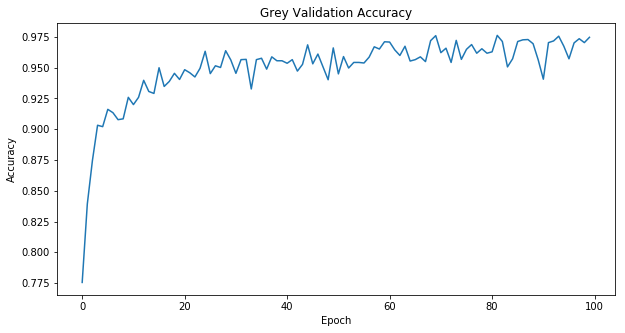

In [19]:
from sklearn.utils import shuffle
import pickle


# Global settings to be used across each implementation
EPOCHS = 100
BATCH_SIZE = 128
LEARN_RATE = 0.001
DROP_PROB = 1.0

outputFrequency = 1



# Get the training data
training_file = 'data/train.p'
validation_file= 'data/valid.p'
#testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
#with open(testing_file, mode='rb') as f:
#    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
#X_test, y_test = test['features'], test['labels']



# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,1))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)
dropProb = tf.placeholder(tf.float32) # probability of keeping a node in

# convert to greyscale
X_train = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_train])
X_valid = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_valid])
#_X_test = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_test])

# Normalize the images - zero mean
X_train = np.array([np.array(normalizeGrey(img)) for img in X_train])
X_valid = np.array([np.array(normalizeGrey(img)) for img in X_valid])
#_X_test = np.array([np.array(normalizeGrey(img)) for img in _X_test])




accuracies = list()

logits = myGreyNet(images,DROP_PROB)#vgg16(images)#leNet(images)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=logits)
lossOperation = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
trainingOperation = optimizer.minimize(lossOperation)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
saver = tf.train.Saver()

# Run the network
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train) # shuffle the training data to get a random selection per batch
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end] # get BATCH_SIZE (i.e. 128) records to processes
            batch_x = batch_x.reshape((batch_x.shape[0],32,32,1))
            
            # Run the training on the batch
            sess.run(trainingOperation, feed_dict={images: batch_x, labels: batch_y, dropProb: DROP_PROB})
        
        # Validate the model
        validation_accuracy = evaluate(X_valid, y_valid, batchSize=BATCH_SIZE, channelCnt=1)
        accuracies.append(validation_accuracy)
        
        if (i)%outputFrequency == 0:
            print("EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    print("\nFINAL EPOCH {} ... Validation Accuracy: {:.3f}".format(i, validation_accuracy))
    
    saver.save(sess, './greyNet_100_001_100.ckpt')
    print("Model saved")

# Display chart of accuracy per epoch
vizAccuracies(accuracies,title='Grey Validation Accuracy')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [28]:
import pandas as pd

dfSigns = pd.read_csv('./signnames.csv')
dfSigns

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [20]:
from PIL import Image
import requests
import numpy as np

imgUrls = [('http://media.gettyimages.com/photos/german-traffic-signs-picture-id459381273',14)
          ]

imgs = list()
labels = list()
for url,y in imgUrls:
    img = Image.open(requests.get(url, stream=True).raw)
    img = img.resize((32,32))
        
    imgs.append(np.array(img)) #images
    labels.append(y)

### Predict the Sign Type for Each Image

In [10]:
import pickle

testing_file = 'data/valid.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

import numpy as np
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#X_test = np.array(imgs)
#y_test = np.array(labels)

#_X = X_test
#_y = y_test


# Normalize the images - zero mean
X_test = np.array([np.array(normalizeRGB(img)) for img in X_test])

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


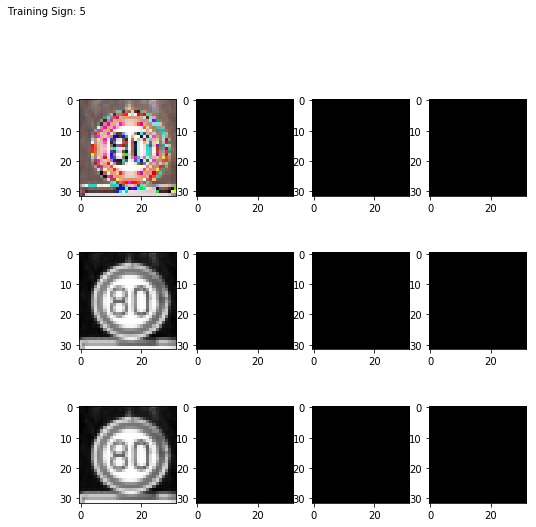

In [11]:
import random

idx = random.randint(0,len(X_test))

img = X_test[idx].squeeze()
lbl = "Training Sign: {}".format(y_test[idx])

imageViz(img,lbl)

### Try RGB

In [12]:
X_test.shape

(4410, 32, 32, 3)

In [1]:
save_file = './rgbNet_10_001_100.ckpt'

# Remove the previous weights and bias
tf.reset_default_graph()

# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,3))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)
dropProb = tf.placeholder(tf.float32) # probability of keeping a node in

logits = myRGBNet(images, dropProb)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))

# Launch the graph
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(save_file + '.meta')
    saver.restore(sess,save_file)

    test_accuracy = evaluate(X_test, y_test, batchSize=128, channelCnt=3)
            
    test_accuracy = sess.run(accuracyOperation, feed_dict={images: X_test, labels: y_test, dropProb: 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

NameError: name 'tf' is not defined

In [ ]:
save_file = './rgbNet_10_001_100.ckpt'

# Remove the previous weights and bias
tf.reset_default_graph()

# Two Variables: weights and bias
images = tf.placeholder(tf.float32,(None,32,32,3))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)
dropProb = tf.placeholder(tf.float32) # probability of keeping a node in

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)

    # Show the values of weights and bias
    print('Weight:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))


### Try Greyscale

In [6]:
import pickle

testing_file = 'data/test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

# convert to greyscale
X_test = np.array([rgb2Grey(img, weights=[.299,.587,.114]) for img in X_test])

# Normalize the images - zero mean
X_test = np.array([np.array(normalizeGrey(img)) for img in X_test])


    
X_test = X_test.reshape((X_test.shape[0],32,32,1))

In [7]:
X_test.shape

(12630, 32, 32, 1)

In [8]:
save_file = './greyNet_10_001_100.ckpt'
#tf.reset_default_graph()
# Global settings to be used across each implementation
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
DROP_PROB = 1.0

outputFrequency = 1

# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,1))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)

logits = myGreyNet(images, DROP_PROB)#vgg16(images)#leNet(images)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=logits)
lossOperation = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
trainingOperation = optimizer.minimize(lossOperation)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
#saver = tf.train.Saver()



# Launch the graph
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(save_file + '.meta')
    saver.restore(sess,save_file)
    #saver.restore(sess, save_file)
    #sess.run(tf.local_variables_initializer())

    test_accuracy = sess.run(accuracyOperation, feed_dict={images: X_test, labels: y_test})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.015914490446448326


### Try RGB + Greyscale

In [18]:
import pickle

testing_file = 'data/test.p'

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_test, y_test = test['features'], test['labels']

# convert to rgb + greyscale - 4 channels (r,g,b,grey)
X_test = np.array([np.concatenate((img,np.array(rgb2Grey(img, weights=[.299,.587,.114])).reshape(32,32,1)),2) for img in X_test])

# Normalize the images - zero mean
X_test = np.array([np.array(normalizeRGBGrey(img)) for img in X_test])

In [19]:
X_test.shape

(12630, 32, 32, 4)

In [23]:
save_file = './rgbGreyNet_100_001_75.ckpt'
#tf.reset_default_graph()
# Global settings to be used across each implementation
EPOCHS = 10
BATCH_SIZE = 128
LEARN_RATE = 0.001
DROP_PROB = 1.0

outputFrequency = 1

# Get the images and labels
images = tf.placeholder(tf.float32,(None,32,32,4))
labels  = tf.placeholder(tf.int32,(None))
oneHotLabels = tf.one_hot(labels,43)

logits = myRGBGreyNet(images, DROP_PROB)#vgg16(images)#leNet(images)
crossEntropy = tf.nn.softmax_cross_entropy_with_logits(labels=oneHotLabels, logits=logits)
lossOperation = tf.reduce_mean(crossEntropy)
optimizer = tf.train.AdamOptimizer(learning_rate=LEARN_RATE)
trainingOperation = optimizer.minimize(lossOperation)
correctPrediction = tf.equal(tf.argmax(logits, 1), tf.argmax(oneHotLabels, 1))
accuracyOperation = tf.reduce_mean(tf.cast(correctPrediction, tf.float32))
#saver = tf.train.Saver()



# Launch the graph
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph(save_file + '.meta')
    saver.restore(sess,save_file)
    #saver.restore(sess, save_file)
    #sess.run(tf.local_variables_initializer())

    test_accuracy = sess.run(accuracyOperation, feed_dict={images: X_test, labels: y_test})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.026603326201438904


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")